# (附) 模拟退火解决JSP问题

姓名：李方舟

学号：2019141080002

## 模拟退火算法提出
*同TSP*
## 实现并解决问题

**经过查阅一些资料，最后还是实现了用模拟退火来解决JSP问题。这里我采用的是王杜娟老师课上的matlab代码里的编码方式，将36个工序全部放在一个数组里，而不是讲义里的指定出队序列的方法。因此我也没仔细去想怎么求代价（总时间），而是将matlab上的代码转换了一下写成了下面的cost函数。在邻域选择方法上和TSP一样。**

## 具体实现
模拟退火的部分同TSP，编码、代价函数和绘图部分进行了修改。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 问题
这里用的就是讲义中的那个车间调度案例，其中每一行代表一个工件的所有工序。而第一个(2, 1)代表第一个工件的第一个工序需要在机器2上加工1个时间单位。

In [2]:
jobs = np.array([[(2,1),(0,3),(1,6), (3,7), (5,3), (4,6)],
                [(1,8),(2,5),(4,10),(5,10),(0,10),(3,4)],
                [(2,5),(3,4),(5,8), (0,9), (1,1), (4,7)],
                [(1,5),(0,5),(2,5), (3,3), (4,8), (5,9)],
                [(2,9),(1,3),(4,5), (5,4), (0,3), (3,1)],
                [(1,3),(3,3),(5,9), (0,10),(4,4), (2,1)]])

定义cost函数，用于计算总某个调度方案的总时长

In [3]:
def cost(schedule):
    j = len(jobs)
    m = len(jobs[0])

    tj = [0]*j
    tm = [0]*m

    ij = [0]*j

    for i in schedule:
        machine, time = jobs[i][ij[i]]
        ij[i] += 1

        start = max(tj[i], tm[machine])
        end = start + time
        tj[i] = end
        tm[machine] = end

    return max(tm)

### 绘图
下面定义绘制甘特图的方法，花了不少时间来写这个函数，参照了[这个链接](https://www.geeksforgeeks.org/python-basic-gantt-chart-using-matplotlib/)。

In [4]:
def plot(schedule):
    
    j = len(jobs)
    m = len(jobs[0])

    tj = [0]*j
    tm = [0]*m

    ij = [0]*j
    
    output = []
    yticks = []
    yticklabels = []
    
    fig, gnt = plt.subplots()
     
    gnt.set_ylim(0, m * 10 + 20)
    gnt.set_xlim(0, cost(schedule))

    gnt.set_xlabel('seconds since start')
    gnt.set_ylabel('Machine')
    
    for i in range(m):
        output.append([])
        yticks.append(i* 10 + 15)
        yticklabels.append(str(i + 1))

    gnt.grid(True)
    gnt.set_yticks(yticks)
    gnt.set_yticklabels(yticklabels)


    for i in schedule:
        machine, time = jobs[i][ij[i]]
        ij[i] += 1
        start = max(tj[i], tm[machine])
        end = start + time
        tj[i] = end
        tm[machine] = end
        
        output[machine].append((start, time))
        
        
    for i in range(m):
        gnt.broken_barh(output[i], ((i+1) * 10, 9),
                                          facecolors =('tab:red'))

### 模拟退火及邻域选择
*同TSP*

In [5]:
#邻域及是否选择
def selectNew(sold, T):
    c = len(sold)
    flag = np.random.randint(5)
    snew = sold.copy()
    if (flag == 0):
        a = np.random.randint(c-1)
        b = np.random.randint(c-1)
        while (b == a):
            b = np.random.randint(c-1)
    else:
        a = np.random.randint(c-2)
        b = a + 1

    snew[a], snew[b] = snew[b], snew[a]
    
    dcost = cost(snew) - cost(sold)
    if (dcost < 0):
        return snew
    else:
        if (np.exp(-dcost / T) > np.random.rand()):
            return snew
        else:
            return sold

### 运行
*同TSP*，但由于绘制gantt图比较麻烦，放在小图里效果很不好。所以我就没有像TSP那样把过程中每个温度下的gantt图都画出来，只print了每个温度下的一些解的总时间，大概还是能看出来是否收敛的

初始解总时间：65


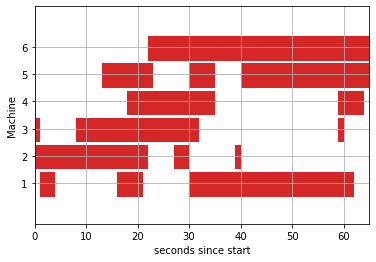

In [6]:
#初始随机解
solu = [i for i in range(len(jobs[0]))] * len(jobs)
np.random.shuffle(solu)
#初始温度 衰减速率
temp = 100
alpha = 0.95
#每个温度迭代次数
iterCount = 200
#一个数组来存储每个温度下的平均距离
allCost = []

print("初始解总时间：" + str(cost(solu)))
plot(solu)

In [7]:
count = 0 #迭代次数
while(temp > 0.05):
    count += 1
    if (count % 10 == 0):
        print("\n当前温度:" + "%.2f" % temp + "  迭代次数: " + str(count) +"  部分解的总时长为: ", end='')
    for i in range(iterCount):
        solu = selectNew(solu, temp)
        c = cost(solu)
        if (i % 20 == 0 and count % 10 == 0):
            print(c, end=' ')
    allCost.append(c)
    temp *= alpha


当前温度:63.02  迭代次数: 10  部分解的总时长为: 86 86 69 106 104 101 105 98 89 95 
当前温度:37.74  迭代次数: 20  部分解的总时长为: 80 79 84 65 74 94 109 78 81 90 
当前温度:22.59  迭代次数: 30  部分解的总时长为: 88 80 78 76 76 75 74 81 72 67 
当前温度:13.53  迭代次数: 40  部分解的总时长为: 73 73 65 70 78 75 72 66 82 93 
当前温度:8.10  迭代次数: 50  部分解的总时长为: 81 78 80 81 99 88 85 78 73 72 
当前温度:4.85  迭代次数: 60  部分解的总时长为: 69 70 65 68 61 60 61 61 76 73 
当前温度:2.90  迭代次数: 70  部分解的总时长为: 64 63 63 63 66 69 77 66 65 62 
当前温度:1.74  迭代次数: 80  部分解的总时长为: 60 59 59 59 59 59 59 59 60 60 
当前温度:1.04  迭代次数: 90  部分解的总时长为: 63 63 63 63 65 64 64 64 64 64 
当前温度:0.62  迭代次数: 100  部分解的总时长为: 62 62 62 62 62 62 62 62 62 62 
当前温度:0.37  迭代次数: 110  部分解的总时长为: 61 61 61 61 61 61 61 61 61 61 
当前温度:0.22  迭代次数: 120  部分解的总时长为: 57 57 57 57 57 57 57 57 57 57 
当前温度:0.13  迭代次数: 130  部分解的总时长为: 55 55 55 55 55 55 55 55 55 55 
当前温度:0.08  迭代次数: 140  部分解的总时长为: 55 55 55 55 55 55 55 55 55 55 

### 展示结果
*同TSP*

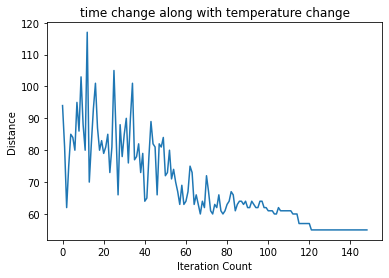

最优结果为：55


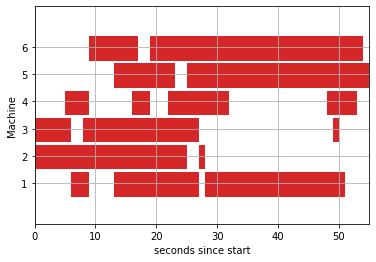

In [8]:
# 距离随温度变化
x = list(range(len(allCost)))
y = allCost
plt.title("time change along with temperature change") 
plt.xlabel("Iteration Count") 
plt.ylabel("Distance")
plt.plot(x,y) 
plt.show()

print("最优结果为：" + str(cost(solu)))

plot(solu)

# 总结与思考
*见TSP*